<a href="https://colab.research.google.com/github/mrromaniuc/quantum-computing/blob/main/IBMCertifiedAssociateDeveloperQiskit/01.6-Return_Circuit_Depth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
%%capture
!pip install qiskit
!pip install qiskit-aer
!pip install qiskit[visualization]
!pip install qiskit-ibm-provider
!pip install imgaug==0.2.5
!pip install pylatexenc

In [4]:
#Setting configuration to use matplotlib in drawings
!mkdir ~/.qiskit
!echo "[default]" > ~/.qiskit/settings.conf
!echo "circuit_drawer = mpl" >> ~/.qiskit/settings.conf
!more ~/.qiskit/settings.conf


#
# Loading IBM credentials
#
API_TOKEN_DIR="/content/drive/'My Drive'/'Colab Notebooks'/QC"
API_TOKEN_FILE="MY_API_TOKEN.txt"

#Mount the google drive first
from google.colab import drive
drive.mount('/content/drive')
#%cd /content/drive/'My Drive'/'Colab Notebooks'/QC
%cd $API_TOKEN_DIR

#Read the MY_API_TOKEN from file...
from qiskit_ibm_provider import IBMProvider
MY_API_TOKEN = ""
with open(API_TOKEN_FILE) as f:
  MY_API_TOKEN=f.readline()
IBMProvider.save_account(MY_API_TOKEN, overwrite=True)

mkdir: cannot create directory ‘/root/.qiskit’: File exists
[default]
circuit_drawer = mpl
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Colab Notebooks/QC


References:
* https://www.youtube.com/watch?v=7AVIc7SkX3M
* https://medium.com/arnaldo-gunzi-quantum/how-to-calculate-the-depth-of-a-quantum-circuit-in-qiskit-868505abc104
* https://github.com/Qiskit/qiskit-ibmq-provider/#migration-guides



## Circuit depth
Circuit depth shown the minimum amount of layers required to run a circuit. It is related to circuit time execution and limited by decoherence time of the qubits

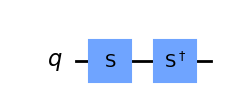

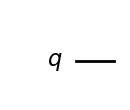

Circuit depth BEFORE transpilation 2
Circuit depth AFTER transpilation 0


In [9]:
#Example where transpilation reduced the depth
from qiskit import QuantumCircuit, transpile, Aer

qc = QuantumCircuit(1)
qc.s(0)
qc.sdg(0)

display(qc.draw())

be = Aer.get_backend("qasm_simulator")
qc_trans = transpile(qc, be)
display(qc_trans.draw())
print(f"Circuit depth BEFORE transpilation {qc.depth()}")
print(f"Circuit depth AFTER transpilation {qc_trans.depth()}")

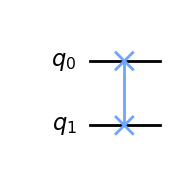

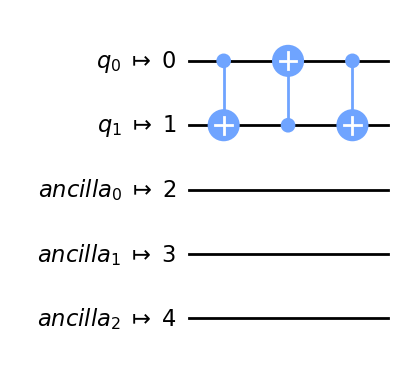

Circuit depth BEFORE transpilation 1
Circuit depth AFTER transpilation 3


In [12]:
#Example where transpilation increases the depth
from qiskit import QuantumCircuit, transpile
from qiskit_ibm_provider import IBMProvider

qc = QuantumCircuit(2)
qc.swap(0,1)

display(qc.draw())

provider = IBMProvider(instance="ibm-q/open/main")
backend  = provider.get_backend("ibmq_lima")

qc_trans = transpile(qc, backend)
display(qc_trans.draw())
print(f"Circuit depth BEFORE transpilation {qc.depth()}")
print(f"Circuit depth AFTER transpilation {qc_trans.depth()}")